In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("dataset.csv", sep=';')

X = data.drop(labels="churn", axis=1)
y = data["churn"]

data.head()

,id_client,genre,espace_client_web,assurance_vie,banque_principale,anciennete_mois,compte_epargne,credit_autres,cartes_bancaires,compte_courant,...,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,branche,churn
0,3463,H,0.0,non,non,37.0,oui,consommation,medium,oui,...,13545.535937,12243.785415,12140.590245,9013.777747,11604.261036,16390.415593,14631.204899,23988.305931,NORD-OUEST,non
1,1869,H,0.0,oui,oui,72.0,oui,consommation,premium,inconnu,...,14014.989673,15508.546834,17547.988381,15470.524076,17537.628474,17410.472648,21258.908987,21554.411100,NORD-OUEST,non
2,3760,H,0.0,non,non,3.0,oui,NaN,medium,non,...,17239.846026,19479.322456,21343.802381,24084.291026,25823.493343,25839.829752,25587.814976,29736.376226,NORD-OUEST,non
3,3820,H,1.0,oui,non,72.0,oui,consommation,medium,oui,...,9229.470887,11935.244779,11014.748509,11791.353542,16354.051367,15449.967495,21149.789933,29211.314803,NORD-OUEST,non
4,1463,F,0.0,non,non,4.0,oui,permanent,medium,non,...,9008.641700,5875.342745,6101.742525,8026.508871,10361.246523,10575.966610,6714.625315,9101.978017,NORD-OUEST,oui


# Data Preprocessing - Categorical features

On impute les données manquantes (np.nan) des features catégorielles non binaires. NB : on transforme en array pour appliquer l'imputer. On utilise un SimpleImputer qui remplace les np.nan par la catégorie la plus fréquente.

In [2]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')


binary_categorical_labels = ["assurance_vie", "banque_principale", "compte_epargne", "compte_courant", "espace_client_web", "espace_client", "PEA", "assurance_auto", "assurance_habitation", "credit_immo", "compte_titres"]
non_binary_categorical_labels = ["type", "genre", "credit_autres", "cartes_bancaires", "methode_contact", "segment_client", "branche"]

categorical_labels = binary_categorical_labels

for labels in enumerate(non_binary_categorical_labels):
    categorical_labels.append(labels[1])

for categorical_features in enumerate(categorical_labels):
    array_to_imput = np.array(X[categorical_features[1]])
    array_to_imput = array_to_imput.reshape(array_to_imput.size, 1)
    array_to_imput = imputer.fit_transform(array_to_imput)
    X[categorical_features[1]] = pd.DataFrame(array_to_imput)
X.head()
    

,id_client,genre,espace_client_web,assurance_vie,banque_principale,anciennete_mois,compte_epargne,credit_autres,cartes_bancaires,compte_courant,...,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,branche
0,3463,H,0.0,non,non,37.0,oui,consommation,medium,oui,...,8285.480439,13545.535937,12243.785415,12140.590245,9013.777747,11604.261036,16390.415593,14631.204899,23988.305931,NORD-OUEST
1,1869,H,0.0,oui,oui,72.0,oui,consommation,premium,inconnu,...,13850.568156,14014.989673,15508.546834,17547.988381,15470.524076,17537.628474,17410.472648,21258.908987,21554.411100,NORD-OUEST
2,3760,H,0.0,non,non,3.0,oui,permanent,medium,non,...,16764.322564,17239.846026,19479.322456,21343.802381,24084.291026,25823.493343,25839.829752,25587.814976,29736.376226,NORD-OUEST
3,3820,H,1.0,oui,non,72.0,oui,consommation,medium,oui,...,6895.959437,9229.470887,11935.244779,11014.748509,11791.353542,16354.051367,15449.967495,21149.789933,29211.314803,NORD-OUEST
4,1463,F,0.0,non,non,4.0,oui,permanent,medium,non,...,8472.294920,9008.641700,5875.342745,6101.742525,8026.508871,10361.246523,10575.966610,6714.625315,9101.978017,NORD-OUEST


On supprime la feature "id_client" complètement inutile. On encode les features catégorielles avec un label encodeur classique (un nombre par catégorie).

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

X = X.drop(labels="id_client", axis=1)

for labels in enumerate(categorical_labels):
    data_to_encode = np.array(X[labels[1]])    
    data_to_encode = encoder.fit_transform(data_to_encode)
    X[labels[1]] = pd.DataFrame(data_to_encode)
X.head()

y = y.map({'non':0, 'oui':1})

# Data Preprocessing - Quantitatives features

On impute les np.nan pour les features quantitatives, avec une stratégie de moyennage (strategy="mean")

In [4]:
n_quantitative_data = 39
other_quantitative_data = ["anciennete_mois", "agios_6mois", "age"]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

for i in range(n_quantitative_data):
    array_to_imput = np.array(X["var_{}".format(i)])
    array_to_imput = array_to_imput.reshape(array_to_imput.size, 1)
    array_to_imput = imputer.fit_transform(array_to_imput)
    X["var_{}".format(i)] = pd.DataFrame(array_to_imput)
    
for labels in enumerate(other_quantitative_data):
    array_to_imput = np.array(X[labels[1]])
    array_to_imput = array_to_imput.reshape(array_to_imput.size, 1)
    array_to_imput = imputer.fit_transform(array_to_imput)
    X[labels[1]] = pd.DataFrame(array_to_imput)
X.head()

,genre,espace_client_web,assurance_vie,banque_principale,anciennete_mois,compte_epargne,credit_autres,cartes_bancaires,compte_courant,espace_client,...,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,branche
0,1,0,0,0,37.0,1,1,1,2,1,...,8285.480439,13545.535937,12243.785415,12140.590245,9013.777747,11604.261036,16390.415593,14631.204899,23988.305931,2
1,1,0,1,1,72.0,1,1,2,0,0,...,13850.568156,14014.989673,15508.546834,17547.988381,15470.524076,17537.628474,17410.472648,21258.908987,21554.411100,2
2,1,0,0,0,3.0,1,2,1,1,1,...,16764.322564,17239.846026,19479.322456,21343.802381,24084.291026,25823.493343,25839.829752,25587.814976,29736.376226,2
3,1,1,1,0,72.0,1,1,1,2,2,...,6895.959437,9229.470887,11935.244779,11014.748509,11791.353542,16354.051367,15449.967495,21149.789933,29211.314803,2
4,0,0,0,0,4.0,1,2,1,1,1,...,8472.294920,9008.641700,5875.342745,6101.742525,8026.508871,10361.246523,10575.966610,6714.625315,9101.978017,2


On normalise les données quantitatives avec un StandardScaler.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for i in range(n_quantitative_data):
    array_to_imput = np.array(X["var_{}".format(i)])
    array_to_imput = array_to_imput.reshape(array_to_imput.size, 1)
    array_to_imput = scaler.fit_transform(array_to_imput)
    X["var_{}".format(i)] = pd.DataFrame(array_to_imput)

for labels in enumerate(other_quantitative_data):
    array_to_imput = np.array(X[labels[1]])
    array_to_imput = array_to_imput.reshape(array_to_imput.size, 1)
    array_to_imput = scaler.fit_transform(array_to_imput)
    X[labels[1]] = pd.DataFrame(array_to_imput)
X.head()

,genre,espace_client_web,assurance_vie,banque_principale,anciennete_mois,compte_epargne,credit_autres,cartes_bancaires,compte_courant,espace_client,...,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,branche
0,1,0,0,0,0.189884,1,1,1,2,1,...,-0.465334,0.168860,-0.229831,-0.424507,-0.992859,-0.819715,-0.439171,-0.785736,-0.024082,2
1,1,0,1,1,1.628063,1,1,2,0,0,...,0.465210,0.241345,0.238051,0.295038,-0.185262,-0.130206,-0.327049,-0.104298,-0.260244,2
2,1,0,0,0,-1.207205,1,2,1,1,1,...,0.952422,0.739278,0.807115,0.800136,0.892131,0.832683,0.599478,0.340786,0.533658,2
3,1,1,1,0,1.628063,1,1,1,2,2,...,-0.697677,-0.497560,-0.274049,-0.574319,-0.645445,-0.267748,-0.542542,-0.115517,0.482711,2
4,0,0,0,0,-1.166114,1,2,1,1,1,...,-0.434096,-0.531657,-1.142512,-1.228078,-1.116345,-0.964164,-1.078276,-1.599692,-1.468512,2


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   genre                         7043 non-null   int32  
 1   espace_client_web             7043 non-null   int64  
 2   assurance_vie                 7043 non-null   int32  
 3   banque_principale             7043 non-null   int32  
 4   anciennete_mois               7043 non-null   float64
 5   compte_epargne                7043 non-null   int32  
 6   credit_autres                 7043 non-null   int32  
 7   cartes_bancaires              7043 non-null   int32  
 8   compte_courant                7043 non-null   int32  
 9   espace_client                 7043 non-null   int32  
 10  PEA                           7043 non-null   int32  
 11  assurance_auto                7043 non-null   int32  
 12  assurance_habitation          7043 non-null   int32  
 13  cre

On peut voir que l'on a un pb avec la feature "interet_compte_epargne_total", qui contient des np.nan ET des " ". On emploie donc deux imputer + scaler (apres avoir converti les string en float) à l'aide d'une pipeline.

In [7]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
                          SimpleImputer(missing_values=" ", strategy='most_frequent'),
                          StandardScaler())

array_to_process = np.array(X["interet_compte_epargne_total"])
array_to_process = array_to_process.reshape(array_to_process.size, 1)
preprocessed_data = model.fit_transform(array_to_process)
preprocessed_data = np.asarray(preprocessed_data, float)
X["interet_compte_epargne_total"] = pd.DataFrame(preprocessed_data)
X["interet_compte_epargne_total"]

0       0.498492
1      -0.222676
2      -0.885409
3       2.568664
4      -0.864011
          ...   
7038   -0.113283
7039   -0.243765
7040    1.962624
7041    1.723499
7042   -0.661792
Name: interet_compte_epargne_total, Length: 7043, dtype: float64

# Features selection

On décide de faire la features selection avec la fonction sklearn.feature_selection.SelectFromModel avec une regression logistique

In [8]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, SGDRegressor

selector = SelectFromModel(LogisticRegression(), threshold='mean')
selector.fit(X, y)
selector.get_support()

C:\Users\Malo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([False,  True, False,  True,  True,  True, False,  True,  True,
       False, False,  True, False, False,  True,  True, False,  True,
       False,  True, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False,  True,  True, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

On peut voir que seules certaines variables explicatives semblent avoir un réel lien avec la target y. On décide de ne plus prendre en compte les autres.

In [9]:
boolean_value_features = selector.get_support()
X_new = X.copy()

for feature in enumerate(X.columns):
    if not boolean_value_features[feature[0]]:
        X_new = X_new.drop(labels=feature[1], axis=1)

X_new
        

,espace_client_web,banque_principale,anciennete_mois,compte_epargne,cartes_bancaires,compte_courant,assurance_auto,type,compte_titres,agios_6mois,age,var_0,var_2,var_8,var_9,var_11,var_12,var_14,var_17,var_20
0,0,0,0.189884,1,1,2,1,1,1,0.885994,-0.848640,-0.590128,-0.064641,0.080840,-0.052775,-0.001814,-0.429827,-6.525473e-01,-0.549690,-0.337852
1,0,1,1.628063,1,2,0,0,1,0,-1.365219,0.585663,1.057227,0.891364,0.762731,0.729674,0.499613,0.550486,2.099812e-01,-0.263106,1.128504
2,0,0,-1.207205,1,1,1,1,1,1,0.296750,-0.162669,-0.120786,0.533521,0.726204,0.761579,0.983349,0.996153,7.486440e-01,0.799233,-0.607311
3,1,0,1.628063,1,1,2,2,1,1,1.616253,0.024414,-0.723169,-1.192622,-0.593242,-0.504038,-0.359885,-0.240518,-4.581567e-01,0.137205,-0.502770
4,0,0,-1.166114,1,1,1,1,1,0,0.189310,-0.723918,-0.360324,-0.874578,-0.521612,-0.503334,-0.851311,-1.254758,-1.446800e+00,-1.842875,-0.662521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0.107702,1,0,2,1,1,0,-0.141406,0.648024,0.105839,-0.239548,-0.994098,-0.970290,-1.200966,-1.247755,-1.104605e+00,-0.685089,-0.331143
7039,0,1,-0.549751,1,1,1,2,0,1,0.825558,-0.037947,0.717538,0.967206,0.981005,0.732994,0.673453,0.257468,4.862879e-01,0.282268,0.111523
7040,0,0,1.586972,1,1,2,2,0,0,1.104232,1.333995,0.791231,-0.227880,-0.162431,-0.250635,-0.297617,0.340317,7.837985e-16,0.000000,0.358226
7041,0,0,1.052791,1,1,2,1,0,1,1.399693,1.396357,-0.689679,-0.180795,-1.139812,-1.383377,-1.623550,-1.647887,-1.609760e+00,-1.358784,-0.330138


# Creation du modele

In [10]:
from sklearn.model_selection import train_test_split
#X_new = X_new[:2000]
#y = y[:2000]
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

from sklearn.model_selection import cross_val_score
model = LogisticRegression()

cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

0.8399009615430078

In [11]:
model.fit(X_train, y_train)
model.predict_proba(X_test)

array([[0.95818756, 0.04181244],
       [0.58557857, 0.41442143],
       [0.99229407, 0.00770593],
       ...,
       [0.85772311, 0.14227689],
       [0.68557186, 0.31442814],
       [0.61088752, 0.38911248]])

Matrice de confusion pour comparer TN, TP, FN, FP

<Axes: >

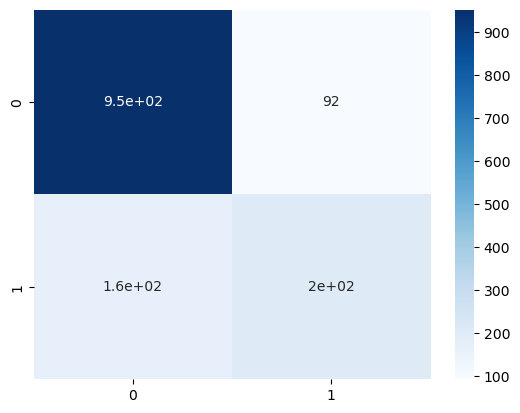

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

c_matrix = confusion_matrix(y_test, model.predict(X_test))
sb.heatmap(c_matrix, annot=True, cmap="Blues", ax)

In [ ]:
On établit une learning curve pour voir si la taille de l'échantillon de données impacte la qualité du modèle

In [12]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model, X_train, y_train, scoring='accuracy', train_sizes = np.linspace(0.2, 1.0, 30), cv=5)
_, test_score, _ = learning_curve(model, X_test, y_test, scoring='accuracy', train_sizes = np.linspace(0.2, 1.0, 30), cv=5)

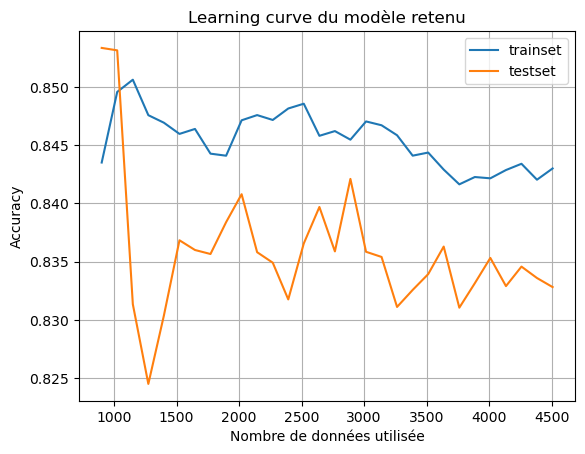

In [18]:
import matplotlib.pyplot as plt
#Score sur le trainset en fonction du nombre de data
plt.plot(N, train_score.mean(axis=1), label="trainset")

#Score sur le testset en fonction du nombre de data
plt.plot(N, test_score.mean(axis=1), label="testset")
plt.legend()
plt.xlabel("Nombre de données utilisée")
plt.ylabel("Accuracy")
plt.title("Learning curve du modèle retenu")
plt.grid()
plt.show()